## Loctech Mid Project
#### Defence Date: Friday, June, 17th 2022

### Topic: Web Scraping

#### Part One: Web scraping

In [1]:
# Import the necessary library and scrap the web to get the data we need

import requests
import pandas as pd
from bs4 import BeautifulSoup as scraper

nigerian_data_web_source = requests.get("https://www.macrotrends.net/countries/NGA/nigeria/population-density")
scraper_init = scraper(nigerian_data_web_source.content, "html.parser")

urban = scraper_init.find("a", string="Urban")["href"]
rural = scraper_init.find("a", string="Rural")["href"]
density = scraper_init.find("a", string="Density")["href"]
birth_rate = scraper_init.find("a", string="Birth Rate")["href"]
death_rate = scraper_init.find("a", string="Death Rate")["href"]
population = scraper_init.find("a", string="Population")["href"]
growth_rate = scraper_init.find("a", string="Growth Rate")["href"]
life_expectancy = scraper_init.find("a", string="Life Expectancy")["href"]
infant_mortality = scraper_init.find("a", string="Infant Mortality Rate")["href"]

# Economy
# Trade
# Health
# Education
# Development
# Labor Force
# Environment
# Crime
# Immigration
# Other

urban_tables = pd.read_html(str(urban))
rural_tables = pd.read_html(str(rural))
density_tables = pd.read_html(str(density))
death_tables = pd.read_html(str(death_rate))
birth_tables = pd.read_html(str(birth_rate))
population_tables = pd.read_html(str(population))
growth_rate_tables = pd.read_html(str(growth_rate))
life_expectancy_tables = pd.read_html(str(life_expectancy))
infant_mortality_tables = pd.read_html(str(infant_mortality))

In [2]:
# To get the columns in the data frame, I discovered the dataframe was a multi index column

print(death_tables[1].columns.values)

density_death_birth_rate_table = pd.concat(
    [
        density_tables[1],
        death_tables[1],
        birth_tables[1],
    ],
    
    sort=False, 
    axis=1
)

# What the freshly scraped dataframe looks like. The very first level is an annoying b*tch
density_death_birth_rate_table

# The only way to truly query a column from a Multiindex ( multilevel ) dataframe
birth_rate_only = birth_tables[1]["Nigeria - Historical Birth Rate Data", "Birth Rate"]
print("\n")
print("Birth Rate Only")
print(birth_rate_only)

[('Nigeria - Historical Death Rate Data', 'Year')
 ('Nigeria - Historical Death Rate Data', 'Death Rate')
 ('Nigeria - Historical Death Rate Data', 'Growth Rate')]


Birth Rate Only
0     36.440
1     36.855
2     37.269
3     37.684
4     38.098
       ...  
68    46.174
69    46.132
70    46.090
71    46.048
72    46.007
Name: (Nigeria - Historical Birth Rate Data, Birth Rate), Length: 73, dtype: float64


#### Part Two: Save the scraped data into csv files

In [3]:
# death_column_name=["Year","Death Rate", "Death Growth Rate"]
# birth_column_name=["Year","Birth Rate", "Birth Growth Rate"]

# Remove the top level from the table to get rid of confusing querying
# Save all the tables to CSV files to make processing them easier

death_tables[1].columns = death_tables[1].columns.droplevel(level=0)
death_tables[1].to_csv("death_rate_stats.csv", index=False)

birth_tables[1].columns = birth_tables[1].columns.droplevel(level=0)
birth_tables[1].to_csv("birth_rate_stats.csv", index=False)

urban_tables[1].columns = urban_tables[1].columns.droplevel(level=0)
urban_tables[1].to_csv("urban_stats.csv", index=False)

rural_tables[1].columns = rural_tables[1].columns.droplevel(level=0)
rural_tables[1].to_csv("rural_stats.csv", index=False)

density_tables[1].columns = density_tables[1].columns.droplevel(level=0)
density_tables[1].to_csv("population_density_stats.csv", index=False)

population_tables[1].columns = population_tables[1].columns.droplevel(level=0)
population_tables[1].to_csv("population_figures_stats.csv", index=False)

growth_rate_tables[1].columns = growth_rate_tables[1].columns.droplevel(level=0)
growth_rate_tables[1].to_csv("growth_rate_stats.csv", index=False)

life_expectancy_tables[1].columns = life_expectancy_tables[1].columns.droplevel(level=0)
life_expectancy_tables[1].to_csv("life_expectancy_stats.csv", index=False)

infant_mortality_tables[1].columns = infant_mortality_tables[1].columns.droplevel(level=0)
infant_mortality_tables[1].to_csv("infant_mortality_stats.csv", index=False)

#### Part Three: Creating A Compound Dataframe

In [4]:
# Get all datasets from the saved dataset files and create a new compund dataframe

urban_file = pd.read_csv("urban_stats.csv")
rural_file = pd.read_csv("rural_stats.csv")
death_rate_file = pd.read_csv("death_rate_stats.csv")
birth_rate_file = pd.read_csv("birth_rate_stats.csv")
life_expectancy_file = pd.read_csv("life_expectancy_stats.csv")
infant_mortality_file = pd.read_csv("infant_mortality_stats.csv")
population_growth_rate_file = pd.read_csv("growth_rate_stats.csv")
population_density_file = pd.read_csv("population_density_stats.csv")
population_figures_file = pd.read_csv("population_figures_stats.csv")

# nigerian_population_density_stats = pd.DataFrame(
#     data={
#         "Year":population_figures_file["Year"],
#         "Population":population_figures_file,
#         "Population Density":population_density_file,
#         "Population Growth":population_growth_rate_file,
#         "Urban Population":urban_file,
#         "Rural Population":rural_file,
#         "Birth Rate":birth_rate_file,
#         "Death Rate":death_rate_file,
#         "Life Expectancy Rate":life_expectancy_file,
#         "Infant Mortalit Rate":infant_mortality_file,
#     }
# )

nigerian_population_density_stats = pd.concat(
    [
        urban_file,
        rural_file,
        death_rate_file,
        birth_rate_file,
        life_expectancy_file,
        infant_mortality_file,
        population_growth_rate_file,
        population_density_file,
        population_figures_file,
    ],
    
    sort=False, 
    axis=1
)

nigerian_population_density_stats # Still with all the NaN values

,Year,Population,% of Total,Change,Year,Population,% of Total,Change,Year,Death Rate,...,Growth Rate,Year,Population Growth Rate,Growth Rate,Year,Population Density,Growth Rate,Year,Population,Growth Rate
0,2020.0,107106007.0,51.96,4.10%,2020.0,99033580.0,48.04,0.89%,2022,11.188,...,-2.570%,2022,216746934,2.53%,2022,234.63,2.53%,2022,216746934,2.53%
1,2019.0,102806950.0,51.16,4.17%,2019.0,98156653.0,48.84,0.91%,2021,11.382,...,-2.500%,2021,211400708,2.55%,2021,228.85,2.55%,2021,211400708,2.55%
2,2018.0,98611151.0,50.34,4.24%,2018.0,97263534.0,49.66,0.94%,2020,11.577,...,-2.440%,2020,206139589,2.58%,2020,223.15,2.58%,2020,206139589,2.58%
3,2017.0,94518523.0,49.52,4.31%,2017.0,96354724.0,50.48,0.97%,2019,11.771,...,-2.380%,2019,200963599,2.60%,2019,217.55,2.60%,2019,200963599,2.60%
4,2016.0,90531026.0,48.68,4.38%,2016.0,95429218.0,51.32,0.99%,2018,11.965,...,-3.970%,2018,195874683,2.62%,2018,212.04,2.62%,2018,195874683,2.62%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1954,29.353,...,-1.430%,1954,40370852,1.73%,1954,43.70,1.73%,1954,40370852,1.73%
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1953,29.802,...,-1.410%,1953,39686163,1.67%,1953,42.96,1.67%,1953,39686163,1.67%
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1952,30.251,...,-1.390%,1952,39035444,1.59%,1952,42.26,1.59%,1952,39035444,1.59%
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1951,30.701,...,-1.370%,1951,38424141,1.49%,1951,41.59,1.49%,1951,38424141,1.49%


#### Part Four: Cleaning The Data

In [5]:
# The new data set contains a lot of NaN values especially in the Urban and Rural columns

# Drop all columns with NaN values as no rows had NaN values, But just in case, I also drop NaN rows in the line after
nigerian_population_density_stats = nigerian_population_density_stats.dropna(axis=1)
nigerian_population_density_stats = nigerian_population_density_stats.dropna()
nigerian_population_density_stats # No NaN values left

,Year,Death Rate,Growth Rate,Year,Birth Rate,Growth Rate,Year,Life Expectancy,Growth Rate,Year,...,Growth Rate,Year,Population Growth Rate,Growth Rate,Year,Population Density,Growth Rate,Year,Population,Growth Rate
0,2022,11.188,-1.700%,2022,36.440,-1.130%,2022,55.44,0.570%,2022,...,-2.570%,2022,216746934,2.53%,2022,234.63,2.53%,2022,216746934,2.53%
1,2021,11.382,-1.680%,2021,36.855,-1.110%,2021,55.12,0.570%,2021,...,-2.500%,2021,211400708,2.55%,2021,228.85,2.55%,2021,211400708,2.55%
2,2020,11.577,-1.650%,2020,37.269,-1.100%,2020,54.81,0.580%,2020,...,-2.440%,2020,206139589,2.58%,2020,223.15,2.58%,2020,206139589,2.58%
3,2019,11.771,-1.620%,2019,37.684,-1.090%,2019,54.49,0.580%,2019,...,-2.380%,2019,200963599,2.60%,2019,217.55,2.60%,2019,200963599,2.60%
4,2018,11.965,-2.520%,2018,38.098,-1.250%,2018,54.18,0.830%,2018,...,-3.970%,2018,195874683,2.62%,2018,212.04,2.62%,2018,195874683,2.62%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,1954,29.353,-1.510%,1954,46.174,0.090%,1954,34.21,1.180%,1954,...,-1.430%,1954,40370852,1.73%,1954,43.70,1.73%,1954,40370852,1.73%
69,1953,29.802,-1.480%,1953,46.132,0.090%,1953,33.81,1.190%,1953,...,-1.410%,1953,39686163,1.67%,1953,42.96,1.67%,1953,39686163,1.67%
70,1952,30.251,-1.470%,1952,46.090,0.090%,1952,33.41,1.210%,1952,...,-1.390%,1952,39035444,1.59%,1952,42.26,1.59%,1952,39035444,1.59%
71,1951,30.701,-1.440%,1951,46.048,0.090%,1951,33.01,1.220%,1951,...,-1.370%,1951,38424141,1.49%,1951,41.59,1.49%,1951,38424141,1.49%


In [6]:
# Next, we can notice that the "Year field continues is redundant. We can get rid of this by droping duplicates"
# The problem with using the .drop_duplicate() method, is that it only drops duplicate rows NOT columns. 
# Therefore in order to drop columns, I first .transpose() the data frame to invert it, then .drop_duplicates()

# Check for duplicate first with .duplicated()
nigerian_population_density_stats.duplicated() # Does NOT take the "axis" argument therefore cannot check for duplicate columns, only rows

0     False
1     False
2     False
3     False
4     False
      ...  
68    False
69    False
70    False
71    False
72    False
Length: 73, dtype: bool

In [7]:
# Have to .transpose() first to use .duplicate() effectively
    
nigerian_population_density_stats.transpose().duplicated()

Year                      False
Death Rate                False
Growth Rate               False
Year                       True
Birth Rate                False
Growth Rate               False
Year                       True
Life Expectancy           False
Growth Rate               False
Year                       True
Infant Mortality Rate     False
Growth Rate               False
Year                       True
Population Growth Rate    False
Growth Rate               False
Year                       True
Population Density        False
Growth Rate                True
Year                       True
Population                 True
Growth Rate                True
dtype: bool

In [8]:
# Next, we drop the duplicates, recall we have to .transpose() first and reassign the variable

nigerian_population_density_stats = nigerian_population_density_stats.transpose().drop_duplicates()
nigerian_population_density_stats # No duplicates anymore

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
Year,2022,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,1959,1958,1957,1956,1955,1954,1953,1952,1951,1950
Death Rate,11.188,11.382,11.577,11.771,11.965,12.274,12.583,12.892,13.201,13.51,...,27.103,27.555,28.004,28.454,28.903,29.353,29.802,30.251,30.701,31.15
Growth Rate,-1.700%,-1.680%,-1.650%,-1.620%,-2.520%,-2.460%,-2.400%,-2.340%,-2.290%,-2.330%,...,-1.640%,-1.600%,-1.580%,-1.550%,-1.530%,-1.510%,-1.480%,-1.470%,-1.440%,0.000%
Birth Rate,36.44,36.855,37.269,37.684,38.098,38.582,39.067,39.551,40.036,40.52,...,46.32,46.341,46.299,46.257,46.216,46.174,46.132,46.09,46.048,46.007
Growth Rate,-1.130%,-1.110%,-1.100%,-1.090%,-1.250%,-1.240%,-1.220%,-1.210%,-1.190%,-0.700%,...,-0.050%,0.090%,0.090%,0.090%,0.090%,0.090%,0.090%,0.090%,0.090%,0.000%
Life Expectancy,55.44,55.12,54.81,54.49,54.18,53.73,53.29,52.84,52.4,51.95,...,36.27,35.8,35.4,35,34.61,34.21,33.81,33.41,33.01,32.62
Growth Rate,0.570%,0.570%,0.580%,0.580%,0.830%,0.840%,0.840%,0.850%,0.860%,0.850%,...,1.300%,1.120%,1.140%,1.150%,1.160%,1.180%,1.190%,1.210%,1.220%,0.000%
Infant Mortality Rate,56.22,57.701,59.181,60.662,62.142,64.708,67.274,69.84,72.406,74.972,...,183.294,185.976,188.839,191.702,194.565,197.428,200.291,203.154,206.017,208.88
Growth Rate,-2.570%,-2.500%,-2.440%,-2.380%,-3.970%,-3.810%,-3.670%,-3.540%,-3.420%,-3.690%,...,-1.440%,-1.520%,-1.490%,-1.470%,-1.450%,-1.430%,-1.410%,-1.390%,-1.370%,0.000%
Population Growth Rate,216746934,211400708,206139589,200963599,195874683,190873244,185960241,181137448,176404934,171765816,...,44255330,43412097,42605124,41830614,41086100,40370852,39686163,39035444,38424141,37859748


In [9]:
# Next we use .tramspose() again to return the dataframe back to its original form

nigerian_population_density_stats = nigerian_population_density_stats.transpose()
nigerian_population_density_stats

,Year,Death Rate,Growth Rate,Birth Rate,Growth Rate,Life Expectancy,Growth Rate,Infant Mortality Rate,Growth Rate,Population Growth Rate,Growth Rate,Population Density
0,2022,11.188,-1.700%,36.44,-1.130%,55.44,0.570%,56.22,-2.570%,216746934,2.53%,234.63
1,2021,11.382,-1.680%,36.855,-1.110%,55.12,0.570%,57.701,-2.500%,211400708,2.55%,228.85
2,2020,11.577,-1.650%,37.269,-1.100%,54.81,0.580%,59.181,-2.440%,206139589,2.58%,223.15
3,2019,11.771,-1.620%,37.684,-1.090%,54.49,0.580%,60.662,-2.380%,200963599,2.60%,217.55
4,2018,11.965,-2.520%,38.098,-1.250%,54.18,0.830%,62.142,-3.970%,195874683,2.62%,212.04
...,...,...,...,...,...,...,...,...,...,...,...,...
68,1954,29.353,-1.510%,46.174,0.090%,34.21,1.180%,197.428,-1.430%,40370852,1.73%,43.7
69,1953,29.802,-1.480%,46.132,0.090%,33.81,1.190%,200.291,-1.410%,39686163,1.67%,42.96
70,1952,30.251,-1.470%,46.09,0.090%,33.41,1.210%,203.154,-1.390%,39035444,1.59%,42.26
71,1951,30.701,-1.440%,46.048,0.090%,33.01,1.220%,206.017,-1.370%,38424141,1.49%,41.59


In [10]:
# Next we rename the labels to make more sense

nigerian_population_density_stats.columns # Get a list of the current colunm labels

Index(['Year', 'Death Rate', 'Growth Rate', 'Birth Rate', 'Growth Rate',
       'Life Expectancy', 'Growth Rate', 'Infant Mortality Rate',
       'Growth Rate', 'Population Growth Rate', 'Growth Rate',
       'Population Density'],
      dtype='object')

In [11]:
# Reassign the values of the columns labels and add a new column for Population density growth rate from the first scraped dataframe

# Old labels 
# ['Year', 'Death Rate', 'Growth Rate', 'Birth Rate', 'Growth Rate',
# 'Life Expectancy', 'Growth Rate', 'Infant Mortality Rate',
# 'Growth Rate', 'Population Growth Rate', 'Growth Rate',
# 'Population Density'],

new_labels = ["Year", "Death Rate", "Death Rate Growth", "Birth Rate", "Birth Rate Growth",
       "Life Expectancy", "Life Expectancy Growth Rate", "Infant Mortality Rate",
       "Infant Mortality Growth Rate", "Population Growth Rate", "Population Growth Percentage",
       "Population Density"]
nigerian_population_density_stats.columns = new_labels

# Add another field for Populatin density growth rate ( was removed with the duplicate fields )
nigerian_population_density_stats["Population Density Growth Rate"] = population_figures_file["Growth Rate"]

nigerian_population_density_stats

,Year,Death Rate,Death Rate Growth,Birth Rate,Birth Rate Growth,Life Expectancy,Life Expectancy Growth Rate,Infant Mortality Rate,Infant Mortality Growth Rate,Population Growth Rate,Population Growth Percentage,Population Density,Population Density Growth Rate
0,2022,11.188,-1.700%,36.44,-1.130%,55.44,0.570%,56.22,-2.570%,216746934,2.53%,234.63,2.53%
1,2021,11.382,-1.680%,36.855,-1.110%,55.12,0.570%,57.701,-2.500%,211400708,2.55%,228.85,2.55%
2,2020,11.577,-1.650%,37.269,-1.100%,54.81,0.580%,59.181,-2.440%,206139589,2.58%,223.15,2.58%
3,2019,11.771,-1.620%,37.684,-1.090%,54.49,0.580%,60.662,-2.380%,200963599,2.60%,217.55,2.60%
4,2018,11.965,-2.520%,38.098,-1.250%,54.18,0.830%,62.142,-3.970%,195874683,2.62%,212.04,2.62%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,1954,29.353,-1.510%,46.174,0.090%,34.21,1.180%,197.428,-1.430%,40370852,1.73%,43.7,1.73%
69,1953,29.802,-1.480%,46.132,0.090%,33.81,1.190%,200.291,-1.410%,39686163,1.67%,42.96,1.67%
70,1952,30.251,-1.470%,46.09,0.090%,33.41,1.210%,203.154,-1.390%,39035444,1.59%,42.26,1.59%
71,1951,30.701,-1.440%,46.048,0.090%,33.01,1.220%,206.017,-1.370%,38424141,1.49%,41.59,1.49%


#### Part Five: Visualisation

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
%matplotlib inline

In [14]:
plt.rcParams['figure.figsize'] = [10, 7]

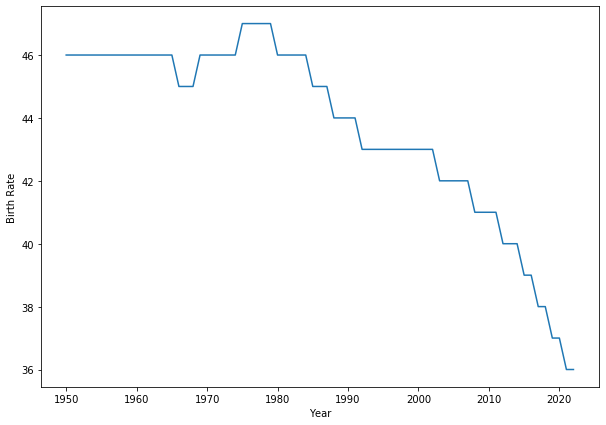

In [15]:
nigerian_population_density_stats["Birth Rate"] = nigerian_population_density_stats["Birth Rate"].astype(int)
nigerian_population_density_stats["Year"] = nigerian_population_density_stats["Year"].astype(int)

birth_vs_year_graph_bar = sns.lineplot(y="Birth Rate", x="Year", data=nigerian_population_density_stats)
birth_vs_year_graph_bar

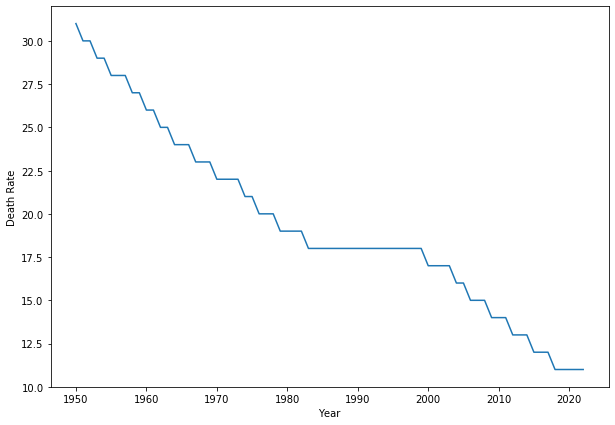

In [16]:
nigerian_population_density_stats["Death Rate"] = nigerian_population_density_stats["Death Rate"].astype(int)
nigerian_population_density_stats["Year"] = nigerian_population_density_stats["Year"].astype(int)

death_vs_year_graph_bar = sns.lineplot(y="Death Rate", x="Year", data=nigerian_population_density_stats)
death_vs_year_graph_bar

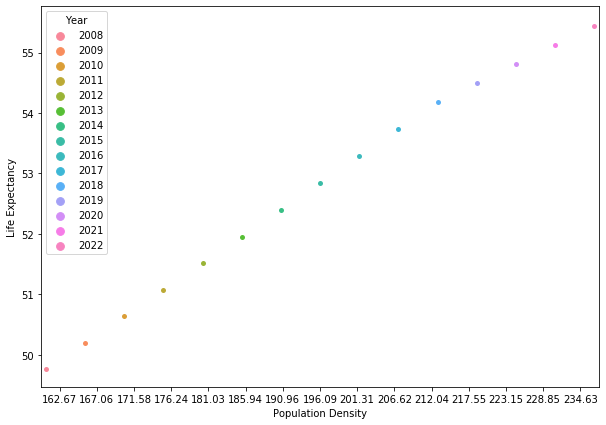

In [24]:
life_expectancy_graph_bar = sns.stripplot(y="Life Expectancy", hue="Year", x='Population Density', dodge=True, data=nigerian_population_density_stats.head(15))
life_expectancy_graph_bar

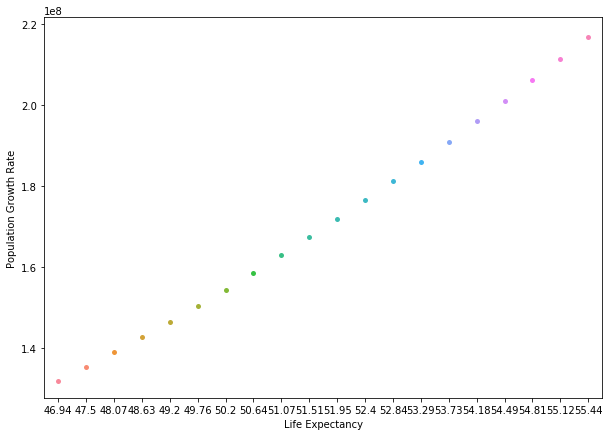

In [59]:
sns.swarmplot(y='Population Growth Rate', x='Life Expectancy', data=nigerian_population_density_stats.head(20),
               )

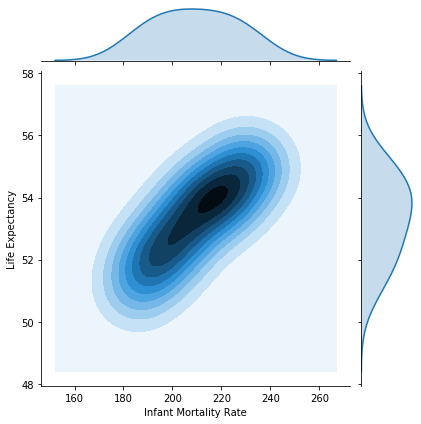

In [74]:
sns.jointplot(x='Infant Mortality Rate', y='Life Expectancy', data=nigerian_population_density_stats.head(10), kind="kde")

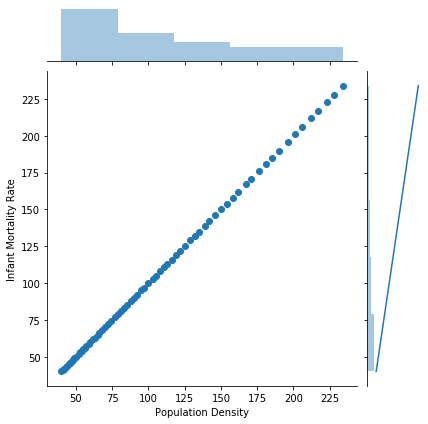

In [66]:
nigerian_population_density_stats["Infant Mortality Rate"] = nigerian_population_density_stats["Infant Mortality Rate"].astype(int)
nigerian_population_density_stats["Population Density"] = nigerian_population_density_stats["Population Density"].astype(int)

sns.jointplot( y="Infant Mortality Rate", x="Population Density", data = nigerian_population_density_stats)

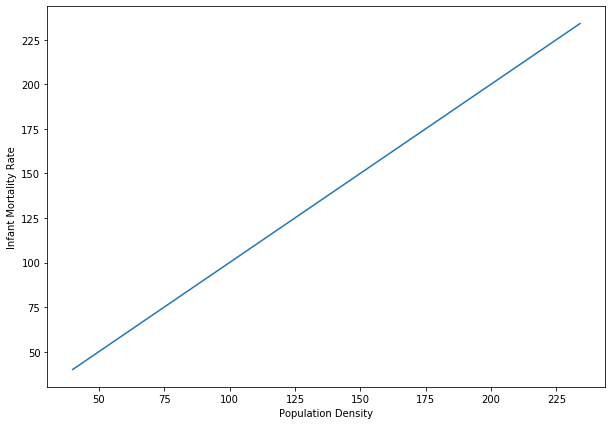

In [67]:
sns.lineplot( y="Infant Mortality Rate", x="Population Density", data = nigerian_population_density_stats)

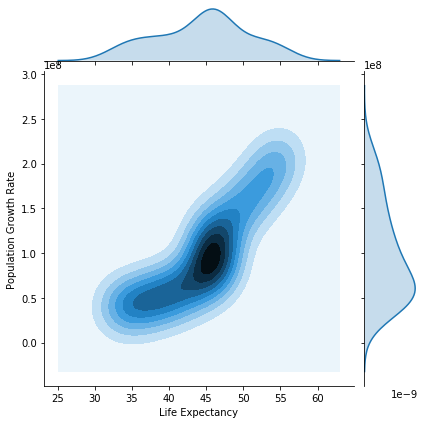

In [65]:
sns.jointplot( x="Life Expectancy", y="Population Growth Rate", data = nigerian_population_density_stats, kind="kde")

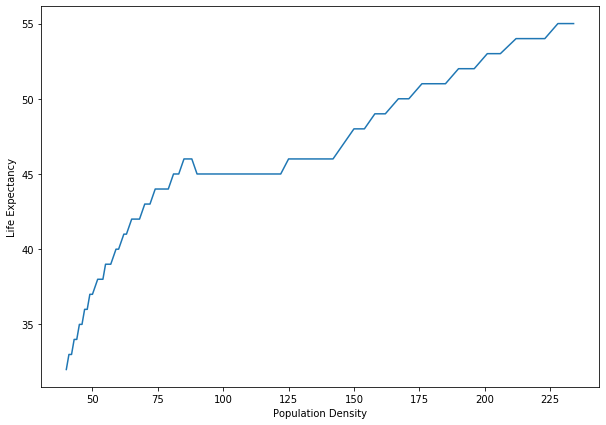

In [69]:
nigerian_population_density_stats["Life Expectancy"] = nigerian_population_density_stats["Life Expectancy"].astype(int)
nigerian_population_density_stats["Population Density"] = nigerian_population_density_stats["Population Density"].astype(int)

sns.lineplot( y="Life Expectancy", x="Population Density", data = nigerian_population_density_stats)

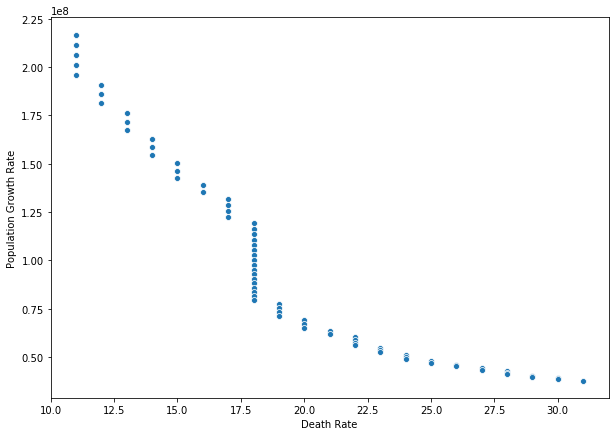

In [76]:
sns.scatterplot( x="Death Rate", y="Population Growth Rate", data = nigerian_population_density_stats)

In [73]:
# sns.plot( y="Deat Rate", x="Population Growth Rate", data = nigerian_population_density_stats)

In [21]:
# birth_vs_death_graph_bar = sns.barplot(x="Birth Rate", y="Death Rate", data=nigerian_population_density_stats)